In [2]:
import numpy as np
import pandas as pd
import sklearn as sk

## Problem

In this exercise, we imagine we have been hired by a Real State company interested in investing in the State of California, USA. They want to **predict the median housing price in a district** to assess if it's worth to buy property in a given district. Currently, a team of experts do it manually, but a recent evaluation found that they were off by 30%.... prompting management to approve your hiring to improve the situation. They would like to start the experiment using census data, that is openly available and includes the per district median house pricing at a given year, plus additional demographic information such as population, median income and median age of the houses.


In [3]:
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))



## Exploring the dataset

* What type of variables it has (*numerical* or *categorical*?). 
* How many data points useful for my problem?
* Are there missing values? If so, in what variable(s)? how many?
* Has any variable been transformed or manipulated before it got to you?    




In [4]:
# Number of columns and number of rows 
housing = load_housing_data()

print("Number of colums {}".format(len(housing.columns)))
print("Number of rows {}".format(housing.size))

Number of colums 10
Number of rows 206400


In [5]:
# Print a concise summary of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
 # List the different values of the categorical variable in 'housing' and count the occurences

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# One variable appears to have some null values
# Create a dataframe with the rows that have the value of that variable = null  

no_bedrooms = housing[housing['total_bedrooms'].isna()]


In [8]:
no_bedrooms.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


In [9]:
# generate descriptive statistics of the housing dataset 
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

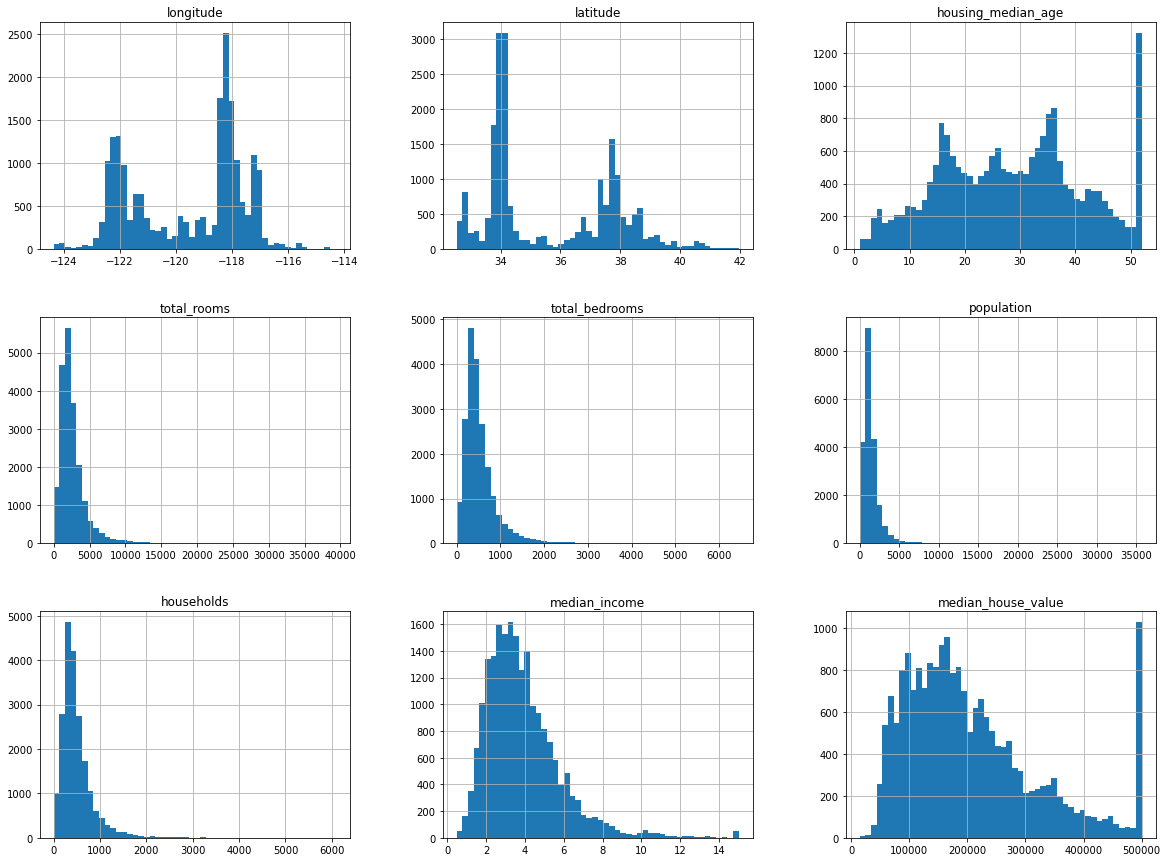

In [10]:
# Another way to get more insight is by plotting histograms
housing.hist(bins=50, figsize=(20,15)) 

* The type of variables it has (*numerical* or *categorical*?): 
    6 numerical, 2 geographical, 1 categorical 
* How many data points useful for my problem?
    Initially all 20640, because all contain the target variable median_house_value:   
* Are there missing values? If so, in what variable(s)? how many?:
    207 data points miss the total_bedrooms variable. If we believe total_bedrooms a useful feature for our model, something will have to be done with those data points.
* Has any variable been transformed or manipulated before it got to you? :   
   This one is for you ;). Based on the stats and the histograms, what three variables have been manipulated before you? (hint, two of them have the same problem)
   
  1. median income has very low values, it has been scaled by 10000 and capped at max. 15 (150000) and min 0.5 (5000)
  2. housing_median_age has been capped at max 52 years 
  3. median_house_value has been capped at max 500000

<AxesSubplot:>

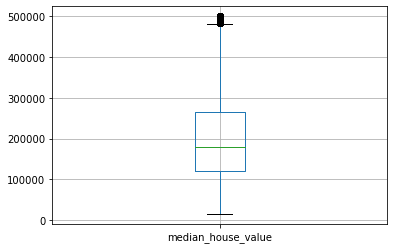

In [11]:
# We use a boxplot
housing.boxplot(column='median_house_value')

# There are no outliers, so we should use RSME, but the max cap creates another issue


## Data cleaning: missing values and capped values

Our exploration concludes that we have one variable with missing values, two variables with capped values (including the target one) and one scaled down variable. The most important issue is the cap on the target variable. Models may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:

 1. Collect proper labels for the districts whose labels were capped.
 2. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).
 
 The second most important issue is missing data in a variable, the options are, in order of consideration,:
 
  1. Collect proper labels for those districts
  2. Decide that you don't use that variable as a feature of your model 
  3. Replace the null value with a sensible non-null value
  4. Discard all data points with null-values  
  
  
  Sadly, we already know option (1) is too expensive in our case, we can't run the census again on those districts. 
  
  To assess option (2) you need a combination of technical and business knowledge. From a technical point of view, you can calculate the correlation between the target variable and the variable you are considering discarding. 

Correlation is quite low, but that cannot be the only factor, you need business. Jim from Business confirms that despite the fact that there is low correlation total_bedrooms is something they can predict accurately in the future, so they are keen to check if it's an useful variable or not and they'd rather you keep it. They also confirm there is no sensible non-null value to replace the missing data, so you are left with option (4), discard the null data points. 

Furthermore, they'd also like to have predictions for housing ages greater than 52 and house values greater than 500k, so those data points must go too. Jim is sorry about all the extra work for you. You hang up the Teams call.


In [13]:
# Using an appropriate filter, discard data points with null total_bedrooms, housing_median_age >= 52 and median_house_value=500001  

fltr_idx = housing['total_bedrooms'].notna() & (housing['housing_median_age'] < 52) & (housing['median_house_value'] < 500001) # retrieve boolean array where each value corresponds to datapoint we want
fltr_housing = housing[fltr_idx].reset_index(drop=True) # This bit resets the indexes of the DataFrame
fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [14]:
# We then check the descriptive stats again

fltr_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18379 non-null  float64
 1   latitude            18379 non-null  float64
 2   housing_median_age  18379 non-null  float64
 3   total_rooms         18379 non-null  float64
 4   total_bedrooms      18379 non-null  float64
 5   population          18379 non-null  float64
 6   households          18379 non-null  float64
 7   median_income       18379 non-null  float64
 8   median_house_value  18379 non-null  float64
 9   ocean_proximity     18379 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [15]:
fltr_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000
mean,-119.484954,35.593833,26.969422,2669.597965,548.003972,1469.890690,508.613145,3.693698,189563.469014
std,1.980713,2.148148,11.433039,2227.810560,429.431372,1163.864204,389.550323,1.569676,95763.629783
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.550000,33.920000,17.000000,1458.000000,300.000000,811.000000,284.000000,2.537000,115400.000000
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.470500,171200.000000
75%,-117.970000,37.670000,36.000000,3182.000000,659.000000,1779.000000,614.000000,4.616700,243200.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

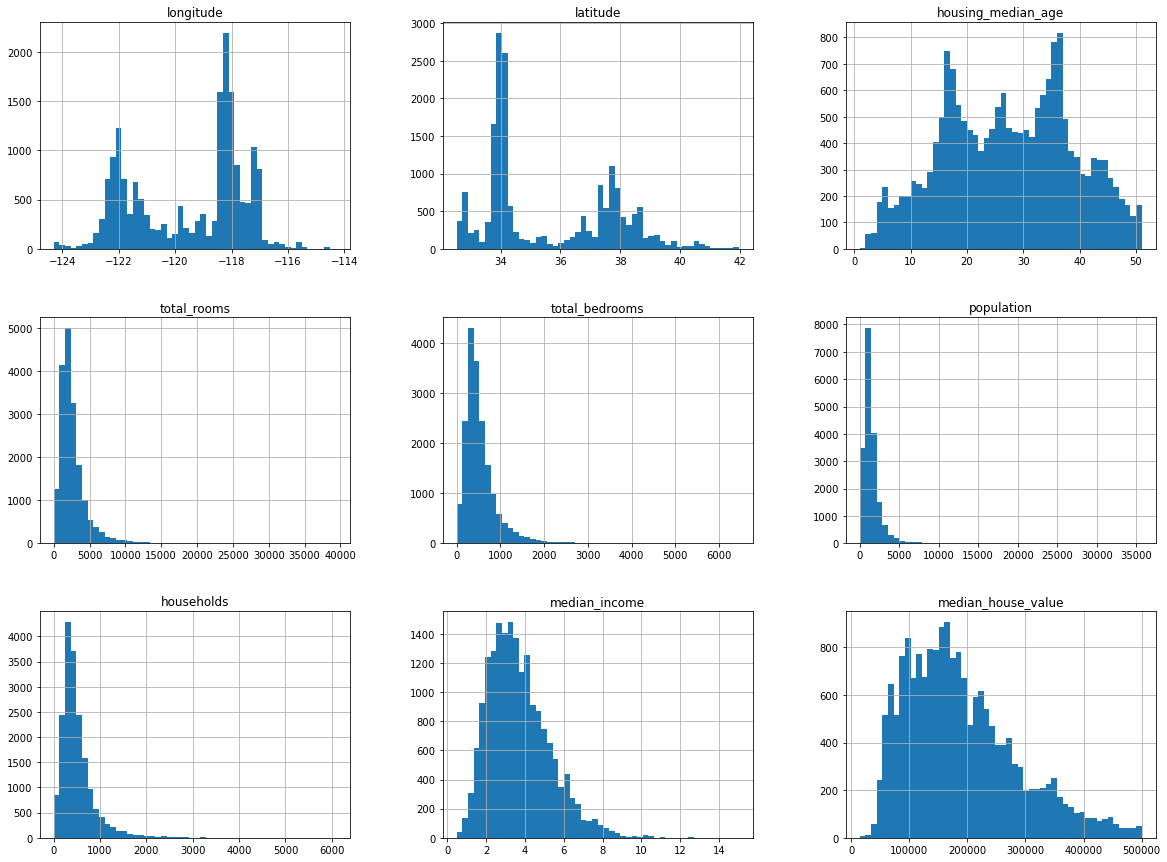

In [16]:
fltr_housing.hist(bins=50, figsize=(20,15)) 

#plt.show()

## Dealing with categorical attributes

The final data issue we have is the categorical attribute 'ocean_proximity'. Since most Machine Learning algorithms work on numerical vectors and matrices only, we need to transform the categorical attribute to a sensible numerical value that still represent its original meaning.

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoded_cat, categories = fltr_housing["ocean_proximity"].factorize() 
encoded_cat_arr = OneHotEncoder().fit_transform(encoded_cat.reshape(-1,1)).toarray()
enc_fltr_housing = fltr_housing.iloc[:,0:9].copy()
for i in range(0, len(categories)):
    enc_fltr_housing[categories[i]] = encoded_cat_arr[:,i]
enc_fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1.0,0.0,0.0,0.0,0.0
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,1.0,0.0,0.0,0.0,0.0
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,1.0,0.0,0.0,0.0,0.0


We have just finished transforming each categorical value to a vector of binary values. As an alternative, we could have only a single numerical attribute that maps to the categories; e.g. 1 for 'NEAR BAY', 2 for '<1H OCEAN', etc. Compared to having a vector of binary values, what are the pros&cons of this approach? Will there be any problem later if we use this approach?

## Data partitioning: train set and test set

A critical part of a Machine Learning project is to separate the available data into a training set and a test set. The most common way of splitting is randomly selecting a sample of 20% as the test set. However, it is important to ensure your split is reproducible, i.e, remains the same for the duration of your project. Otherwise, if you run the notebook the enxt day, you would have scrmabled everything!

Use the Scikit-learn's train_test_split method to split the fltr_housing dataset in 80% training and 20% test in a reproducible manner
 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Note: The textbook splits the dataset earlier than us, that is indeed better but it has the caveat that if you do transformations to the training set (e.g. one hot encoding) you have to remember them so you apply them to the test set. We will cover how to do this next week.

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(enc_fltr_housing, test_size=0.2, random_state=42)

## Choose and apply Machine Learning algorithm

After so much work on preparing our dataset, we are ready to try our Machine Learning algorithm. Whilst there are many algorithms or *models* for regression task, let us apply the basic approach first: the Linear Regression algorithm. In many cases, a simple model such as the Linear Regression works perfectly fine. If the simple model is sufficient, then there is no need to apply complex algorithms which could require the tuning of many hyperparameters, larger number of datapoints, or longer time to train.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set.iloc[:, [idx for idx in range(len(train_set.columns)) if idx != 8]], train_set['median_house_value'])
prediction = lnr_regressor1.predict(test_set.iloc[:, [idx for idx in range(len(test_set.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set['median_house_value'], prediction)))

RMSE =  59798.23584798094


We have just trained a linear regression model based on our training set. Then, we have used it to predict the house price on our test set, and we have computed the RMSE to quantify how good our model is. Clearly, the RMSE we have got is very high. That implies that our Machine Learning algorithm is not performing well enough.

## Feature engineering

We have just finished our first prototype, but it doesn't seem to work well. As someone say: 'Garbage in, Garbage out'! So, it could be the case that our dataset is not comprised of useful attributes that are going to help our Machine Learning algorithm to learn and predict well. 

Besides your earlier discussion with Jim about what features should be discarded, it is also possible to experiment with combinations of attributes. Speaking of Jim, he just sent you an email. He has been thinking about it and from a business perspective you don't care much about district's total rooms and total bedrooms, you care about number of rooms per houes, ratio of bedrooms over rooms, and number of people per house. Let's engineer the features and see how much our Machine Learning algorithm will improve. 



In [20]:
# Create a copy of the training set and add three columns
# with number of rooms per house, ratio of bedrooms over rooms, and number of people per house

train_set2 = train_set.copy()
train_set2['room_per_house'] = train_set2['total_rooms']/train_set2['households']
train_set2['bedroom_per_room'] = train_set2['total_bedrooms']/train_set2['total_rooms']
train_set2['pop_per_house'] = train_set2['population']/train_set2['households']
train_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
1310,-117.67,34.02,16.0,3042.0,524.0,1516.0,475.0,4.8906,178500.0,0.0,0.0,1.0,0.0,0.0,6.404211,0.172255,3.191579
16156,-117.08,33.12,43.0,107.0,44.0,107.0,48.0,0.7054,137500.0,0.0,1.0,0.0,0.0,0.0,2.229167,0.411215,2.229167
10301,-117.11,32.75,34.0,2131.0,594.0,1373.0,562.0,2.1130,102100.0,0.0,0.0,0.0,1.0,0.0,3.791815,0.278742,2.443060
8823,-118.15,34.17,36.0,930.0,280.0,1024.0,300.0,1.0846,146400.0,0.0,1.0,0.0,0.0,0.0,3.100000,0.301075,3.413333
10428,-117.69,33.60,12.0,3258.0,421.0,1464.0,435.0,6.5413,332000.0,0.0,1.0,0.0,0.0,0.0,7.489655,0.129220,3.365517


In [21]:
test_set2 = test_set.copy()
test_set2['room_per_house'] = test_set2['total_rooms']/test_set2['households']
test_set2['bedroom_per_room'] = test_set2['total_bedrooms']/test_set2['total_rooms']
test_set2['pop_per_house'] = test_set2['population']/test_set2['households']
test_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
10163,-118.25,33.89,35.0,1582.0,391.0,1957.0,404.0,2.4537,91500.0,0.0,1.0,0.0,0.0,0.0,3.915842,0.247155,4.844059
6667,-119.42,36.35,20.0,1469.0,303.0,1031.0,259.0,1.6645,48000.0,0.0,0.0,1.0,0.0,0.0,5.671815,0.206263,3.980695
7931,-117.04,32.68,9.0,3087.0,609.0,1530.0,556.0,3.7750,125000.0,0.0,0.0,0.0,1.0,0.0,5.552158,0.197279,2.751799
2748,-118.13,34.07,20.0,2130.0,654.0,1870.0,578.0,2.3664,192200.0,0.0,1.0,0.0,0.0,0.0,3.685121,0.307042,3.235294
1456,-122.51,37.58,20.0,64.0,21.0,59.0,21.0,2.2375,450000.0,0.0,0.0,0.0,1.0,0.0,3.047619,0.328125,2.809524


In [22]:
# Create a new Linear Regression estimator on the new data frame, fit, predict and evaluate.

lnr_regressor2 = LinearRegression()
lnr_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction2 = lnr_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set2['median_house_value'], prediction2)))

RMSE =  58942.80249389639


Whilst the improvement is not that significant, it has shown that *feature engineering* is very useful.

## Random Forest

It is possible that the Linear Regression model is not powerful enough to learn from our dataset. We could try different regression models: say, the Random Forest Regression. With Scikit-Learn, we can try many different algorithms easily.

In [23]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor1 = RandomForestRegressor()
frst_regressor1.fit(train_set.iloc[:, [idx for idx in range(len(train_set.columns)) if idx != 8]], train_set['median_house_value'])
prediction3 = frst_regressor1.predict(test_set.iloc[:, [idx for idx in range(len(test_set.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set['median_house_value'], prediction3)))

RMSE =  43999.73089493983


With the Forest Regression model, we have achieved a good improvement on the non-engineered dataset. Now, we could also try it on the engineered dataset.

In [24]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor2 = RandomForestRegressor()
frst_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction4 = frst_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set2['median_house_value'], prediction4)))

RMSE =  45199.11202539131
